# 4회차 실습 과제

## 문제 항목

| 문제     | 주제                         | 핵심 개념                                                         |
|----------|------------------------------|-------------------------------------------------------------------|
| 문제 1   | 편의점 일일 매출 분석        | 정규성 검정, 단일표본 검정 (t vs Wilcoxon), 효과크기, 모수 vs 비모수 비교 |
| 문제 2   | 두 생산라인 제품 무게 비교   | 등분산 검정, 독립표본 검정 (Welch's t vs Mann-Whitney U), 이상치 영향   |
| 문제 3   | 요일별 고객 방문 패턴 분석   | 카이제곱 적합도 검정, Cohen's w, 표준화 잔차, Cochran's rule, Monte Carlo |
| 문제 4   | 연령대별 운동 선호도 조사    | 카이제곱 독립성 검정, Cramér's V, 조정된 잔차, Fisher 정확검정 (2×2)    |

---

## 핵심 공식 정리

### 가설검정 프로세스

| 단계 | 내용                                   | 비고                                          |
|------|----------------------------------------|-----------------------------------------------|
| 1    | **분석 목표** 파악                     | 무엇을 검정하려 하는지 명확히 정의합니다       |
| 2    | **가설 설정** (H₀, H₁)                | 귀무가설과 대립가설을 수식으로 표현합니다       |
| 3    | **검정 방향** 결정                     | 양측/단측 검정을 선택하고 근거를 제시합니다     |
| 4    | **가정 검정**                          | 정규성, 등분산, 기대빈도 조건 등을 확인합니다   |
| 5    | **검정 수행**                          | 가정 결과에 따라 적절한 검정을 선택합니다       |
| 6    | **효과크기** 산출                      | 통계적 유의성과 별개로 실질적 의미를 판단합니다 |
| 7    | **결론** 도출                          | p-value와 효과크기를 종합하여 해석합니다        |

> 카이제곱 검정(적합도, 독립성)은 검정 자체가 "차이 존재 여부"를 판정하므로
> 양측/단측 개념이 적용되지 않습니다 (3단계 생략).

### 양측검정 vs 단측검정

| 구분          | 양측검정 (two-sided)           | 단측검정 (one-sided)              |
|---------------|--------------------------------|-----------------------------------|
| H₁ 형태      | μ ≠ μ₀                        | μ > μ₀ 또는 μ < μ₀              |
| 사용 시기     | 방향을 사전에 특정할 수 없을 때 | 이론적·실무적 근거로 방향이 명확할 때 |
| 검정력        | 상대적으로 낮음                | 같은 α에서 더 높은 검정력         |
| 주의          | 가장 보수적이고 안전한 선택     | 사전 근거 없이 사용하면 부적절     |

### 정규성 검정

| 방법            | 판정 기준                          | 비고                              |
|-----------------|------------------------------------|-----------------------------------|
| Shapiro-Wilk    | p > 0.05 → 정규성 기각 못 함      | 소표본에 적합, 대표본에서 과민    |
| Q-Q Plot        | 점들이 대각선 위 → 정규            | 시각적 판단, Shapiro-Wilk와 함께  |

### 검정 선택 가이드 (연속형)

| 상황            | 정규성 충족                     | 정규성 위반                   |
|-----------------|---------------------------------|-------------------------------|
| 단일·대응표본   | 단일/대응표본 t-검정            | Wilcoxon signed-rank          |
| 독립 2집단      | Student's t (등분산) / Welch's t (이분산) | Mann-Whitney U        |

### 비모수 검정 효과크기

| 효과크기         | 적용 검정               | 해석 기준 (small / medium / large) |
|------------------|-------------------------|------------------------------------|
| rank-biserial r  | Wilcoxon, Mann-Whitney  | 0.1 / 0.3 / 0.5                   |

### 카이제곱 검정

| 검정           | 공식                                                          | 자유도                   |
|----------------|---------------------------------------------------------------|--------------------------|
| 적합도 검정    | $\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$                   | $df = k - 1$            |
| 독립성 검정    | $\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$          | $df = (r-1)(c-1)$       |
| 기대빈도       | $E_{ij} = \frac{R_i \times C_j}{N}$                          | —                        |

### 효과크기 (카이제곱)

| 효과크기     | 적용 검정      | 공식                                        | 해석 기준 (small / medium / large) |
|--------------|----------------|---------------------------------------------|------------------------------------|
| Cohen's w    | 적합도         | $\sqrt{\chi^2 / N}$                        | 0.1 / 0.3 / 0.5                   |
| Cramér's V   | 독립성         | $\sqrt{\chi^2 / (N \cdot \min(r-1, c-1))}$ | df*에 따라 다름                    |
| φ (Phi)      | 독립성 (2×2)   | $\sqrt{\chi^2 / N}$                        | 0.1 / 0.3 / 0.5                   |

### Cochran's rule (기대빈도 조건)

| 조건 | 기준                                     | 위반 시 대안                              |
|------|------------------------------------------|-------------------------------------------|
| (1)  | 기대빈도 < 5인 셀이 전체의 20% 이하     | 적합도 → Monte Carlo / 범주 병합          |
| (2)  | 기대빈도 < 1인 셀이 0개                  | 독립성(2×2) → Fisher / 독립성(R×C) → FFH  |

### 판정 규칙

| p-value 결과  | 판정             | 해석                                          |
|---------------|------------------|-----------------------------------------------|
| p ≤ α         | H₀ **기각**      | "이 결과가 우연이라고 보기 어렵습니다" → 유의   |
| p > α         | H₀ **기각 실패** | "증거 부족, 판단 보류" (H₀가 참은 아닙니다!)    |

---

In [69]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
import warnings
import platform
from statsmodels.stats.contingency_tables import Table

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

print("=" * 60)
print("4회차 실습 과제: 비모수 검정, 카이제곱 검정")
print("=" * 60)


4회차 실습 과제: 비모수 검정, 카이제곱 검정


---

## 문제 1: 편의점 일일 매출 분석

한 편의점 본사는 특정 지점의 일일 매출이 전국 평균 **250만원**과 다른지 확인하려 합니다.

20일간의 매출 데이터를 수집했는데, 매출 분포가 정규분포를 따르는지 먼저 확인해야 합니다.

**분석 목표**: 이 편의점의 일일 매출이 전국 평균(250만원)과 통계적으로 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [3]:
print("\n[문제 1] 편의점 일일 매출 분석")
print("=" * 50)

np.random.seed(501)
daily_sales = np.round(np.random.lognormal(mean=5.5, sigma=0.3, size=20), 1)
mu0_sales = 250.0  # 전국 평균 매출 (만원)

print(f"일일 매출 데이터 (n = {len(daily_sales)}일, 단위: 만원):")
print(daily_sales)
print(f"\n표본 평균: {np.mean(daily_sales):.1f}만원")
print(f"표본 중앙값: {np.median(daily_sales):.1f}만원")
print(f"전국 평균(μ₀): {mu0_sales}만원")



[문제 1] 편의점 일일 매출 분석
일일 매출 데이터 (n = 20일, 단위: 만원):
[249.5 157.8 304.8 352.4 137.4 213.2 298.3 209.3 363.6 363.4 194.7 418.4
 207.9 250.8 206.3 372.8 367.1 355.8 214.9 207.6]

표본 평균: 272.3만원
표본 중앙값: 250.2만원
전국 평균(μ₀): 250.0만원


### 문제 1-1: 정규성 검정 (가정 검정)

**(a)** 수치적 정규성 검정(Shapiro-Wilk)을 수행하세요.

**(b)** Q-Q Plot을 그려 시각적으로 분포를 확인하세요.

**(c)** 두 결과를 종합하여 "정규분포를 따르는가?"를 판단하고,

Q-Q Plot에서 관찰되는 패턴이 어떤 분포 특성을 나타내는지 설명하세요.

In [4]:
print("\n[문제 1-1] 정규성 검정")
print("-" * 40)

# TODO (a): 정규성 검정 수행
stat_sw, p_sw = stats.shapiro(daily_sales)

print(f"(a) 정규성 검정:")
print(f"    W = {stat_sw}")
print(f"    p-value = {p_sw}")
print(f"    판정: shapiro test 결과, p-value가 0.07이므로 귀무가설을 기각할 수 없다.")
print(f'    따라서, 정규분포를 따른다고 할 수 있다.')
print(f'    다만, p-value가 유의수준 근방에 머물러 있으므로 추가적인 표본 수집이 더 필요하다.')


[문제 1-1] 정규성 검정
----------------------------------------
(a) 정규성 검정:
    W = 0.9127881381255227
    p-value = 0.0720445012268248
    판정: shapiro test 결과, p-value가 0.07이므로 귀무가설을 기각할 수 없다.
    따라서, 정규분포를 따른다고 할 수 있다.
    다만, p-value가 유의수준 근방에 머물러 있으므로 추가적인 표본 수집이 더 필요하다.


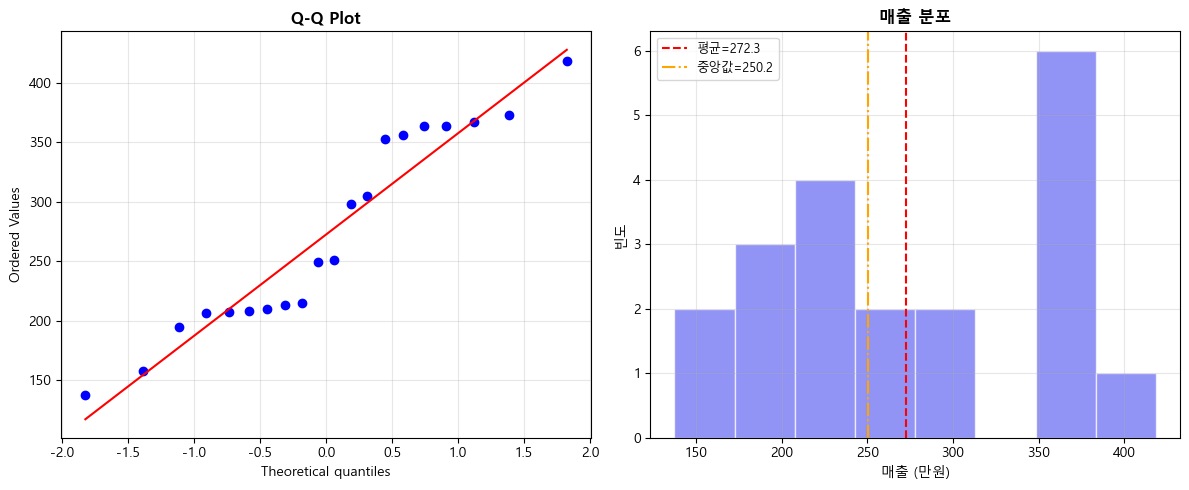

In [5]:
# TODO (b): Q-Q Plot + 히스토그램 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TODO: Q-Q Plot 그리기
stats.probplot(daily_sales, dist = 'norm', plot = axes[0])
axes[0].set_title("Q-Q Plot", fontsize=12, fontweight="bold")
axes[0].grid(alpha=0.3)

# 히스토그램
axes[1].hist(daily_sales, bins=8, color="#6366F1", alpha=0.7, edgecolor="white")
axes[1].axvline(np.mean(daily_sales), color="red", linestyle="--", label=f"평균={np.mean(daily_sales):.1f}")
axes[1].axvline(np.median(daily_sales), color="orange", linestyle="-.", label=f"중앙값={np.median(daily_sales):.1f}")
axes[1].set_title("매출 분포", fontsize=12, fontweight="bold")
axes[1].set_xlabel("매출 (만원)")
axes[1].set_ylabel("빈도")
axes[1].legend(fontsize=9)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# TODO (c): 종합 판단
print(f"\n(c) 종합 판단:")
print(f"    Shapiro-Wilk: p-value가 0.07로 귀무가설을 기각할 수 없다.")
print(f'    따라서 정규분포를 따른다고 할 수 있지만, p-value가 유의수준과 큰 차이가 없기 때문에 QQ plot을 통해 정규성을 검토하였다.')
print(f"    Q-Q Plot 패턴: qq-plot의 패턴과 히스토그램으로 보았을 때, 쌍봉의 형태로 보인다.")
print(f"    결론: 현재 샘플이 20개로 소표본인 점과 qq-plot의 패턴으로 보았을 때, 정규성을 만족한다고 볼 수 없다.")
print(f'    따라서, 비모수 검정을 수행해야 한다.')


(c) 종합 판단:
    Shapiro-Wilk: p-value가 0.07로 귀무가설을 기각할 수 없다.
    따라서 정규분포를 따른다고 할 수 있지만, p-value가 유의수준과 큰 차이가 없기 때문에 QQ plot을 통해 정규성을 검토하였다.
    Q-Q Plot 패턴: qq-plot의 패턴과 히스토그램으로 보았을 때, 쌍봉의 형태로 보인다.
    결론: 현재 샘플이 20개로 소표본인 점과 qq-plot의 패턴으로 보았을 때, 정규성을 만족한다고 볼 수 없다.
    따라서, 비모수 검정을 수행해야 한다.


### 문제 1-2: 가설 설정과 검정 수행

**(a)** 분석 목표에 맞는 **귀무가설(H₀)**과 **대립가설(H₁)**을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

**(c)** 정규성 검정 결과를 바탕으로, 이 데이터에 적절한 검정 방법을 선택하고 그 이유를 설명하세요.

**(d)** 선택한 검정을 수행하세요 (α = 0.05).

**(e)** 효과크기를 계산하세요.

> 모수 검정인지 비모수 검정인지에 따라 적절한 효과크기 지표가 다릅니다.
> 해석 기준과 함께 보고하세요.

**(f)** p-value와 효과크기를 종합하여 최종 결론을 내리세요.

In [7]:
print("\n[문제 1-2] 가설 설정과 검정 수행")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 일일 매출 평균은 250만원이다. mu = 250")
print(f"    H₁: 일일 매출 평균은 250만원이 아니다. mu != 250")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 일일 매출이 전국 평균 250만원과 다른지를 확인하기 때문에, 양측 검정을 수행해야 한다.")

# TODO (c): 검정 방법 선택
print(f"\n(c) 검정 방법 선택:")
print(f"    정규성 결과: qq-plot과 표본 크기를 고려했을 때 정규성을 만족하지 않는다.")
print(f"    선택: 따라서, 윌콕슨 부호 순위 검정을 진행해야 한다.")
print(f"    이유: 정규성을 만족하지 않기 때문에 단일 표본의 비모수 검정 방법을 사용해야 한다.")

# TODO (d): 검정 수행
test_stat, p_value = stats.wilcoxon(daily_sales - mu0_sales, alternative = 'two-sided')

print(f"\n(d) 검정 결과:")
print(f"    검정통계량: {test_stat}")
print(f"    p-value: {p_value}")
print(f"    판정 (α=0.05): 유의수준 5%하에서 귀무가설을 기각할 수 없다.")
print(f"    따라서, 일일 매출 평균은 250만원이라고 할 수 있다.")

# TODO (e): 효과크기
result_w = pg.wilcoxon(daily_sales, np.full(len(daily_sales), mu0_sales))
effect_size = result_w['RBC'].values[0]

print(f"\n(e) 효과크기: {effect_size}")
print(f"    해석: 효과크기가 0.31로 두 집단간의 차이가 시각적으로 확인이 가능한 수준이다.")

# TODO (f): 종합 결론
print(f"\n(f) 종합 결론:")
print(f"    wilcoxon 부호 순위 검정 결과 귀무가설을 기각할 수 없다.")
print(f'    따라서, 일일 매출 평균은 전국 평균인 250만원을 따른다고 할 수 있다.')
print(f'    하지만, 효과크기와 샘플 수를 고려했을 때, 추가적으로 표본을 수집해 다시 검정해야 할 필요성이 있다.')


[문제 1-2] 가설 설정과 검정 수행
----------------------------------------
(a) 가설 설정:
    H₀: 일일 매출 평균은 250만원이다. mu = 250
    H₁: 일일 매출 평균은 250만원이 아니다. mu != 250

(b) 검정 방향:
    선택: 양측검정
    근거: 일일 매출이 전국 평균 250만원과 다른지를 확인하기 때문에, 양측 검정을 수행해야 한다.

(c) 검정 방법 선택:
    정규성 결과: qq-plot과 표본 크기를 고려했을 때 정규성을 만족하지 않는다.
    선택: 따라서, 윌콕슨 부호 순위 검정을 진행해야 한다.
    이유: 정규성을 만족하지 않기 때문에 단일 표본의 비모수 검정 방법을 사용해야 한다.

(d) 검정 결과:
    검정통계량: 72.0
    p-value: 0.2305126190185547
    판정 (α=0.05): 유의수준 5%하에서 귀무가설을 기각할 수 없다.
    따라서, 일일 매출 평균은 250만원이라고 할 수 있다.

(e) 효과크기: 0.3142857142857143
    해석: 효과크기가 0.31로 두 집단간의 차이가 시각적으로 확인이 가능한 수준이다.

(f) 종합 결론:
    wilcoxon 부호 순위 검정 결과 귀무가설을 기각할 수 없다.
    따라서, 일일 매출 평균은 전국 평균인 250만원을 따른다고 할 수 있다.
    하지만, 효과크기와 샘플 수를 고려했을 때, 추가적으로 표본을 수집해 다시 검정해야 할 필요성이 있다.


### 문제 1-3: 모수 vs 비모수 비교

같은 데이터에 대해 **모수 검정과 비모수 검정을 모두** 수행하고, 결과를 비교해 보세요.

**(a)** 모수 검정(단일표본 t-검정)의 결과를 구하세요.

**(b)** 비모수 검정(Wilcoxon signed-rank)의 결과를 구하세요.

**(c)** 두 검정의 결론이 같은가요, 다른가요?

만약 다르다면, 이 데이터의 어떤 특성 때문에 차이가 발생하는지 설명하세요.

In [8]:
print("\n[문제 1-3] 모수 vs 비모수 비교")
print("-" * 40)

# TODO (a): 모수 검정
t_stat_1, p_t = stats.ttest_1samp(daily_sales, popmean = mu0_sales, alternative = 'two-sided')

print(f"(a) 단일표본 t-검정: t = {t_stat_1}, p = {p_t}")

# TODO (b): 비모수 검정
w_stat_1, p_w = stats.wilcoxon(daily_sales - mu0_sales, alternative = 'two-sided')

print(f"\n(b) Wilcoxon signed-rank: W = {w_stat_1}, p = {p_w}")

# TODO (c): 비교 해석
print(f"\n(c) 결과 비교 및 해석:")
print(f"    모수 검정 판정: 귀무가설을 기각할 수 없다.")
print(f"    비모수 검정 판정: 귀무가설을 기각할 수 없다.")
# print(f"    차이 원인: ...")


[문제 1-3] 모수 vs 비모수 비교
----------------------------------------
(a) 단일표본 t-검정: t = 1.1877682773664504, p = 0.24956150037570585

(b) Wilcoxon signed-rank: W = 72.0, p = 0.2305126190185547

(c) 결과 비교 및 해석:
    모수 검정 판정: 귀무가설을 기각할 수 없다.
    비모수 검정 판정: 귀무가설을 기각할 수 없다.


---

## 문제 2: 두 생산라인 제품 무게 비교

식품 공장에서 A라인과 B라인에서 생산된 과자의 무게가 동일한지 검증합니다.

A라인은 안정적이지만, B라인은 간헐적 기계 오류로 무게 편차가 큰 것으로 의심됩니다.

**분석 목표**: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [9]:
print("\n[문제 2] 두 생산라인 제품 무게 비교")
print("=" * 50)

np.random.seed(502)
line_a = np.round(np.random.normal(loc=100, scale=3, size=25), 1)
line_b_normal = np.random.normal(loc=98, scale=2.5, size=20)
line_b_outlier = np.random.normal(loc=110, scale=3, size=5)
line_b = np.round(np.concatenate([line_b_normal, line_b_outlier]), 1)
np.random.shuffle(line_b)

print(f"A라인 (n={len(line_a)}): 평균={np.mean(line_a):.1f}g, 중앙값={np.median(line_a):.1f}g, SD={np.std(line_a, ddof=1):.1f}g")
print(f"B라인 (n={len(line_b)}): 평균={np.mean(line_b):.1f}g, 중앙값={np.median(line_b):.1f}g, SD={np.std(line_b, ddof=1):.1f}g")



[문제 2] 두 생산라인 제품 무게 비교
A라인 (n=25): 평균=100.0g, 중앙값=100.0g, SD=3.1g
B라인 (n=25): 평균=100.2g, 중앙값=98.5g, SD=5.2g


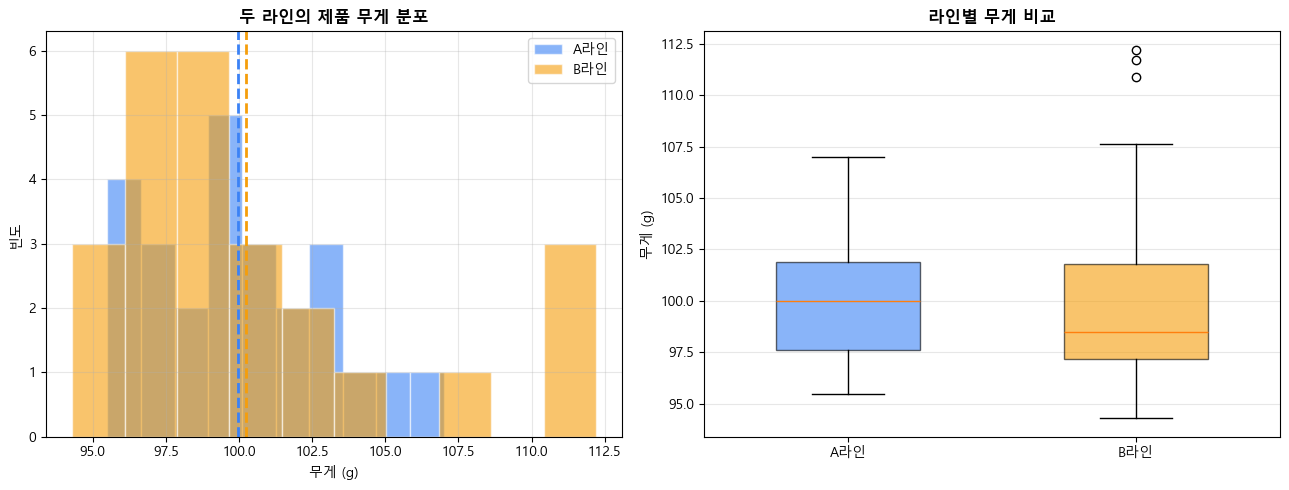

In [10]:
# 시각화: 두 라인 비교
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].hist(line_a, bins=10, alpha=0.6, color='#3B82F6', edgecolor='white', label='A라인')
axes[0].hist(line_b, bins=10, alpha=0.6, color='#F59E0B', edgecolor='white', label='B라인')
axes[0].axvline(np.mean(line_a), color='#3B82F6', linestyle='--', linewidth=2)
axes[0].axvline(np.mean(line_b), color='#F59E0B', linestyle='--', linewidth=2)
axes[0].set_xlabel('무게 (g)')
axes[0].set_ylabel('빈도')
axes[0].set_title('두 라인의 제품 무게 분포', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

bp = axes[1].boxplot([line_a, line_b], labels=['A라인', 'B라인'],
                      patch_artist=True, widths=0.5)
bp['boxes'][0].set_facecolor('#3B82F6')
bp['boxes'][0].set_alpha(0.6)
bp['boxes'][1].set_facecolor('#F59E0B')
bp['boxes'][1].set_alpha(0.6)
axes[1].set_ylabel('무게 (g)')
axes[1].set_title('라인별 무게 비교', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 문제 2-1: 가설 설정 및 가정 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)**과 **대립가설(H₁)**을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

**(c)** 각 라인의 정규성을 검정하세요.

**(d)** 두 라인의 Q-Q Plot을 나란히 그리세요.

**(e)** 정규성이 충족된다면, 등분산 검정도 수행하세요.

**(f)** 가정 검정 결과를 종합하여 어떤 검정을 사용할지 결정하세요.

의사결정 과정을 단계별로 설명하세요.

In [11]:
print("\n[문제 2-1] 가설 설정 및 가정 검정")
print("-" * 40)

# A라인은 안정적이지만, B라인은 간헐적 기계 오류로 무게 편차가 큰 것으로 의심됩니다. 
# 편차면, b-line이 불안정한 걸 보고싶으면 그냥 levene하면 되는 거 아니야? 왜 평균으로 볼까...?

# **분석 목표**: 두 생산라인(A, B)의 제품 무게에 통계적으로 유의한 차이가 있는지 검정합니다. (요 말은 또 평균이긴 하네)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 두 생산라인의 제품 무게의 평균은 같다. H0 : mu1 = mu2")
print(f"    H₁: 두 생산라인의 제품 무게의 평균은 다르다. H1 : mu1 != mu2")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 두 생산라인의 무게가 같은지, 차이가 있는지를 보려고 하는 문제이기에, 양측 검정을 수행해야 한다.")

# TODO (c): 정규성 검정
stat_a, p_a = stats.shapiro(line_a)
stat_b, p_b = stats.shapiro(line_b)

print(f"\n(c) 정규성 검정:")
print(f"    A라인: W={stat_a}, p={p_a}")
print(f"    B라인: W={stat_b}, p={p_b}")



[문제 2-1] 가설 설정 및 가정 검정
----------------------------------------
(a) 가설 설정:
    H₀: 두 생산라인의 제품 무게의 평균은 같다. H0 : mu1 = mu2
    H₁: 두 생산라인의 제품 무게의 평균은 다르다. H1 : mu1 != mu2

(b) 검정 방향:
    선택: 양측검정
    근거: 두 생산라인의 무게가 같은지, 차이가 있는지를 보려고 하는 문제이기에, 양측 검정을 수행해야 한다.

(c) 정규성 검정:
    A라인: W=0.9615916503832134, p=0.44707979729857106
    B라인: W=0.8348553450968026, p=0.0009207648072219322


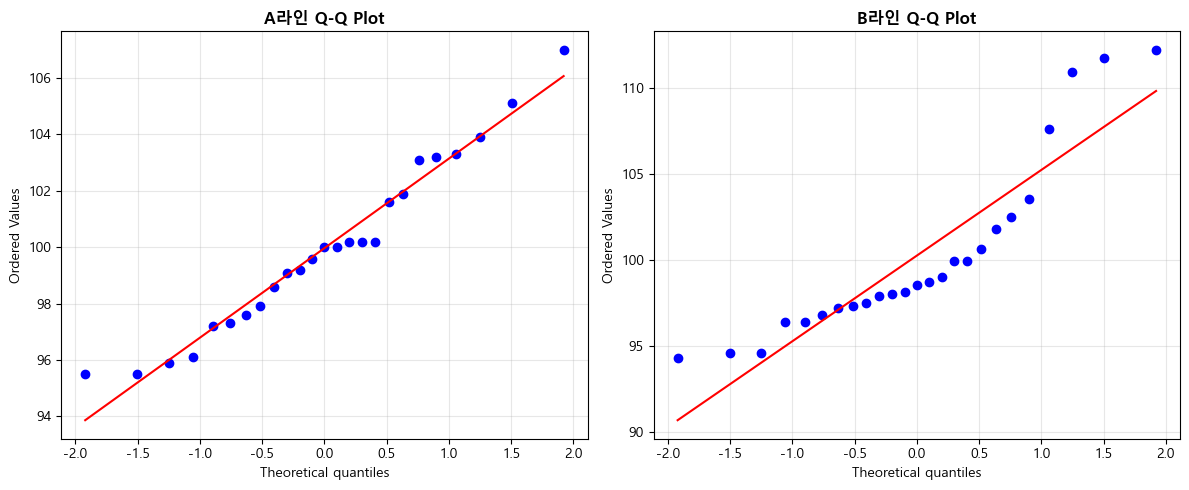

In [12]:
# TODO (d): Q-Q Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# TODO: 각 라인의 Q-Q Plot 그리기
stats.probplot(line_a, dist = 'norm', plot = axes[0])
stats.probplot(line_b, dist = 'norm', plot = axes[1])

axes[0].set_title("A라인 Q-Q Plot", fontsize=12, fontweight="bold")
axes[0].grid(alpha=0.3)
axes[1].set_title("B라인 Q-Q Plot", fontsize=12, fontweight="bold")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
# TODO (e): 등분산 검정 (정규성 충족 시)

# 정규성을 만족하지 않지만 그냥 했습니다.
lev_stat, lev_p = stats.levene(line_a, line_b)

print(f"(e) 등분산 검정:")
print(f"    F={lev_stat}, p={lev_p}")
print(f"    판정: 두 집단의 분산이 같다고 할 수 있다.")

# TODO (f): 검정 방법 결정
print(f"\n(f) 검정 방법 결정:")
print(f"    [1] 정규성 — A: O, B: X")
print(f"    [2] 등분산 — ...")
print(f"    [3] 결론 → 사용할 검정: 맨 휘트니 U 검정")


(e) 등분산 검정:
    F=1.6507296774763391, p=0.20502535238595
    판정: 두 집단의 분산이 같다고 할 수 있다.

(f) 검정 방법 결정:
    [1] 정규성 — A: O, B: X
    [2] 등분산 — ...
    [3] 결론 → 사용할 검정: 맨 휘트니 U 검정


### 문제 2-2: 검정 수행 및 효과크기

**(a)** 2-1에서 결정한 검정을 수행하세요 (α = 0.05).

**(b)** 적절한 효과크기를 계산하세요.

> 모수 검정(t-검정)이면 Cohen's d를, 비모수 검정이면 rank-biserial r을 계산합니다.

**(c)** p-value와 효과크기를 종합하여 최종 결론을 작성하세요.

In [14]:
print("\n[문제 2-2] 검정 수행 및 효과크기")
print("-" * 40)

# TODO (a): 검정 수행
test_stat_2, p_value_2 = stats.mannwhitneyu(line_a, line_b, alternative = 'two-sided')

print(f"(a) 검정 결과:")
print(f"    검정통계량: {test_stat_2}")
print(f"    p-value: {p_value_2}")
print(f"    판정 (α=0.05): 유의수준 5%하에서 귀무가설을 기각할 수 없다.")
print(f'    따라서, 두 생산라인의 제품 무게 수준은 같다고 할 수 있다.')

# TODO (b): 효과크기
effect_size_2 = pg.mwu(line_a, line_b)['RBC'].values[0]

print(f"\n(b) 효과크기: {effect_size_2:.2f}")
print(f"    해석 (작은/중간/큰): 효과 크기가 {effect_size_2:.2f}로 작다.")

# TODO (c): 종합 결론
print(f"\n(c) 종합 결론:")
print(f"    맨-휘트니 검정 결과 유의수준 5% 하에서 귀무가설을 기각할 수 없다.")
print(f"    또한, 효과크기도 작은 것을 고려했을 때 두 생산라인의 제품 무게 수준은 같다고 할 수 있다.")



[문제 2-2] 검정 수행 및 효과크기
----------------------------------------
(a) 검정 결과:
    검정통계량: 347.5
    p-value: 0.5031183792231538
    판정 (α=0.05): 유의수준 5%하에서 귀무가설을 기각할 수 없다.
    따라서, 두 생산라인의 제품 무게 수준은 같다고 할 수 있다.

(b) 효과크기: 0.11
    해석 (작은/중간/큰): 효과 크기가 0.11로 작다.

(c) 종합 결론:
    맨-휘트니 검정 결과 유의수준 5% 하에서 귀무가설을 기각할 수 없다.
    또한, 효과크기도 작은 것을 고려했을 때 두 생산라인의 제품 무게 수준은 같다고 할 수 있다.


### 문제 2-3: 모수 vs 비모수 — 왜 가정 검정이 중요한가?

**(a)** 같은 데이터에 대해 Welch's t-검정과 Mann-Whitney U 검정을 **모두** 수행하고 결과를 비교하세요.

**(b)** 두 검정의 결론이 다르다면, 어떤 검정의 결과를 더 신뢰해야 하는지 B라인의 분포 특성과 연결하여 설명하세요.

**(c)** "표본이 크면 t-검정을 써도 괜찮다"는 주장에 대해,

이 데이터의 B라인처럼 이상치가 포함된 경우에도 성립하는지 의견을 작성하세요.

In [15]:
print("\n[문제 2-3] 모수 vs 비모수 비교")
print("-" * 40)

# TODO (a): 두 검정 비교
t_stat_comp, p_t_comp = stats.ttest_ind(line_a, line_b, equal_var = False, alternative = 'two-sided')

u_stat_comp, p_u_comp = stats.mannwhitneyu(line_a, line_b, alternative = 'two-sided')

print(f"(a) 검정 결과 비교:")
print(f"    Welch's t: t={t_stat_comp}, p={p_t_comp}")
print(f"    Mann-Whitney U: U={u_stat_comp}, p={p_u_comp}")

# TODO (b): 해석
print(f"\n(b) 어떤 검정을 더 신뢰해야 하나요?")
print(f"    맨-휘트니 검정을 더 신뢰해야 한다.")

# TODO (c): CLT와 이상치
print(f"\n(c) 이상치가 있을 때 t-검정의 한계:")
print(f"    위치 모수인 평균은 이상치에 영향을 많이 받으므로 평균을 대표값으로서 활용하기 어렵다.")
print(f"    또한, 이상치의 영향으로 표준편차가 증가하기 때문에, 차이가 있어도 없다고 할 2종 오류가 증가할 수 있다.")


[문제 2-3] 모수 vs 비모수 비교
----------------------------------------
(a) 검정 결과 비교:
    Welch's t: t=-0.22167795570919085, p=0.8257196834842396
    Mann-Whitney U: U=347.5, p=0.5031183792231538

(b) 어떤 검정을 더 신뢰해야 하나요?
    맨-휘트니 검정을 더 신뢰해야 한다.

(c) 이상치가 있을 때 t-검정의 한계:
    위치 모수인 평균은 이상치에 영향을 많이 받으므로 평균을 대표값으로서 활용하기 어렵다.
    또한, 이상치의 영향으로 표준편차가 증가하기 때문에, 차이가 있어도 없다고 할 2종 오류가 증가할 수 있다.


---

## 문제 3: 요일별 고객 방문 패턴 분석

한 음식점 사장이 "요일에 따라 방문 고객 수가 다르지 않다"고 주장합니다.

한 주간 방문 고객 수를 조사하여 이 주장을 검증합니다.

총 **420명**의 고객이 방문했습니다.

**분석 목표**: 요일별 고객 방문 비율이 균등(각 1/7)한지 검정합니다.

**주어진 데이터:**

In [16]:
print("\n[문제 3] 요일별 고객 방문 패턴 분석")
print("=" * 50)

np.random.seed(503)
days = ['월', '화', '수', '목', '금', '토', '일']
true_probs = [0.10, 0.10, 0.12, 0.12, 0.16, 0.22, 0.18]
visits = np.random.choice(days, size=420, p=true_probs)
observed_visits = np.array([np.sum(visits == d) for d in days])

print(f"요일별 방문 고객 수 (총 {observed_visits.sum()}명):")
df_visits = pd.DataFrame({'요일': days, '관측 빈도': observed_visits})
display(df_visits)


[문제 3] 요일별 고객 방문 패턴 분석
요일별 방문 고객 수 (총 420명):


,요일,관측 빈도
0,월,50
1,화,43
2,수,40
3,목,54
4,금,69
5,토,89
6,일,75


### 문제 3-1: 가설 설정 및 적합도 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

> 카이제곱 검정은 "차이가 존재하는가?"를 판정하므로 양측/단측 개념이 적용되지 않습니다.

**(b)** 기대빈도를 계산하고, Cochran's rule을 확인하세요.

기대빈도 < 5인 셀이 전체의 20%를 초과하거나 기대빈도 < 1인 셀이 있는지 점검하세요.

**(c)** 적합도 검정을 수행하세요 (α = 0.05).

**(d)** 결론을 내리세요.

In [ ]:
print("\n[문제 3-1] 가설 설정 및 적합도 검정")
print("-" * 40)

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 요일 별 방문 고객 수는 동일하다.")
print(f"    H₁: 요일 별 방문 고객 수는 동일하지 않다.")

# TODO (b): 기대빈도 + Cochran's rule 확인
n_total_visits = observed_visits.sum()
expected_visits = np.array([n_total_visits / 7] * 7)  # 균등 분포 가정 하의 기대빈도

print(f"\n(b) 기대빈도: {expected_visits}")
# Cochran's rule 점검
print('모든 셀의 기대빈도가 5 이상이므로 코크란 룰을 만족한다.')

# TODO (c): 적합도 검정
chi2_visits, p_visits = stats.chisquare(observed_visits, expected_visits)

print(f"\n(c) 적합도 검정:")
print(f"    χ² = {chi2_visits}")
print(f"    자유도 (df) = {len(days) - 1}")
print(f"    p-value = {p_visits}")

# TODO (d): 결론
print(f"\n(d) 결론 (α=0.05):")
print(f"    유의수준 5%하에서 귀무가설을 기각한다.")
print(f"    따라서, 요일 별 방문 고객 수는 동일하지 않다고 할 수 있다.")



[문제 3-1] 가설 설정 및 적합도 검정
----------------------------------------
(a) 가설 설정:
    H₀: 요일 별 방문 고객 수는 동일하다.
    H₁: 요일 별 방문 고객 수는 동일하지 않다.

(b) 기대빈도: [60. 60. 60. 60. 60. 60. 60.]

(c) 적합도 검정:
    χ² = 32.86666666666667
    자유도 (df) = 6
    p-value = 1.1123757485602509e-05

(d) 결론 (α=0.05):


### 문제 3-2: 효과크기와 사후분석 (잔차 분석)

**(a)** 효과크기(Cohen's w)를 계산하고 해석하세요.

**(b)** 표준화 잔차를 계산하세요.

**각 요일**에 대해 잔차 값과 방향(기대보다 많음/적음)을 보고하세요.

> 표준화 잔차 = (O − E) / √E

**(c)** |잔차| > 2인 요일을 찾고, 이 요일들이 왜 기대와 다른지 실생활 관점에서 해석하세요.

**(d)** 관측 빈도와 기대 빈도를 비교하는 막대 그래프를 그리세요.

In [ ]:
print("\n[문제 3-2] 효과크기와 사후분석")
print("-" * 40)

# TODO (a): Cohen's w
cohens_w_visits = np.sqrt(chi2_visits / n_total_visits)
print(cohens_w_visits)

print(f"(a) Cohen's w = {cohens_w_visits}")
print(f"    해석: 효과크기가 0.3미만으로 작은 수준의 효과 크기이다.")

# TODO (b): 표준화 잔차
print(f"\n(b) 사후분석 — 표준화 잔차:")
std_residuals = (observed_visits - expected_visits) / np.sqrt(expected_visits)
result = [[days[i],std_r.item()] for i, std_r in enumerate(std_residuals) if abs(std_r) > 2]
print(result)

# TODO (c): 해석
print(f"\n(c) |잔차| > 2인 요일 해석:")
print(f"    화,수는 기대빈도 보다 통계적으로 기대빈도 대비 더 적게 방문하고, 금요일은 더 많이 방문한다.")


[문제 3-2] 효과크기와 사후분석
----------------------------------------
0.279739107480467
(a) Cohen's w = 0.279739107480467
    해석: 효과크기가 0.3미만으로 큰 차이가 없다.

(b) 사후분석 — 표준화 잔차:
[['화', -2.1946905628508695], ['수', -2.581988897471611], ['토', 3.7438839013338363]]

(c) |잔차| > 2인 요일 해석:
    화,수는 기대빈도 보다 통계적으로 기대빈도 대비 더 적게 방문하고, 금요일은 더 많이 방문한다.


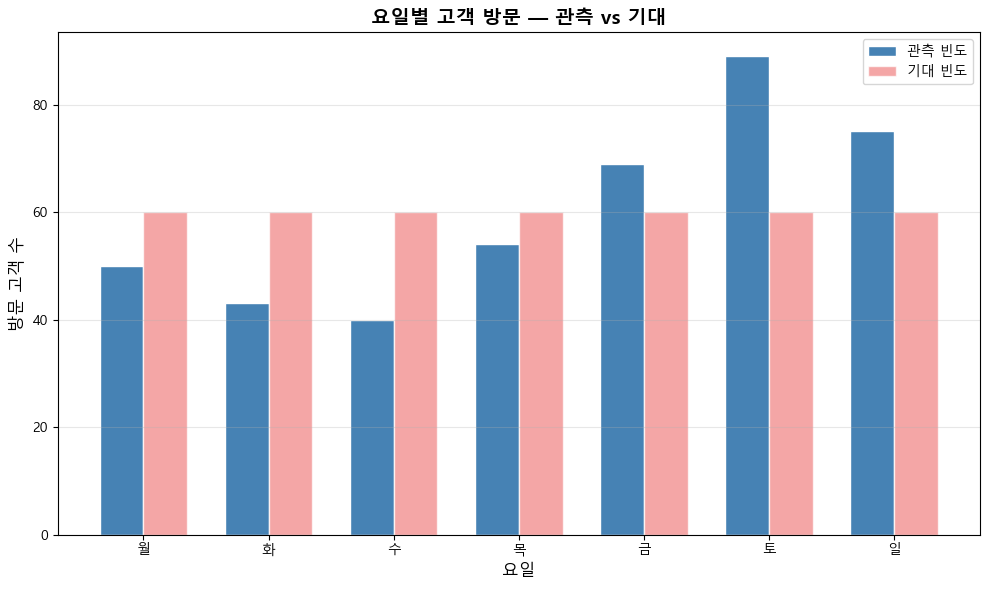

In [33]:
# TODO (d): 관측 vs 기대 빈도 막대 그래프
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(days))
width = 0.35

# TODO: 관측/기대 빈도 나란히 막대 그래프

ax.bar(x - width / 2, observed_visits, width, label = '관측 빈도', color = 'steelblue', edgecolor = 'white')
ax.bar(x + width / 2, expected_visits, width, label = '기대 빈도', color = 'lightcoral', edgecolor = 'white', alpha = 0.7)

ax.set_xlabel('요일', fontsize=12)
ax.set_ylabel('방문 고객 수', fontsize=12)
ax.set_title('요일별 고객 방문 — 관측 vs 기대', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### 문제 3-3: 소규모 카페 음료 선호도

위와 별개 상황입니다. 한 소규모 카페에서 5가지 음료의 선호도가 균등한지 조사했습니다.

총 **22명**의 고객이 응답했습니다.

**분석 목표**: 5가지 음료의 선호도가 균등(각 1/5)한지 검정합니다.

**주어진 데이터:**

In [34]:
print("\n[문제 3-3] 소규모 카페 음료 선호도")
print("-" * 40)

menu = ['아메리카노', '라떼', '카푸치노', '스무디', '에이드']
observed_small = np.array([8, 5, 4, 3, 2])
n_total_small = observed_small.sum()

print(f"음료별 선호 고객 수 (총 {n_total_small}명):")
df_small = pd.DataFrame({'음료': menu, '관측 빈도': observed_small})
display(df_small)



[문제 3-3] 소규모 카페 음료 선호도
----------------------------------------
음료별 선호 고객 수 (총 22명):


,음료,관측 빈도
0,아메리카노,8
1,라떼,5
2,카푸치노,4
3,스무디,3
4,에이드,2


**(a)** 가설을 설정하세요.

**(b)** 균등 분포를 가정할 때 기대빈도를 계산하고, Cochran's rule을 점검하세요. 조건이 충족되나요?

**(c)** Cochran's rule이 위반되면, 사용할 수 있는 대안 방법은 무엇인가요?
  - 범주 병합과 Monte Carlo 시뮬레이션 중 어떤 것이 이 상황에 더 적절한지 설명하세요.

**(d)** 선택한 대안 방법을 적용하여 검정을 수행하세요.

**(e)** 효과크기(Cohen's w)를 계산하고 해석하세요.

In [62]:
# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 각 음료에 대한 선호도는 균등하다.")
print(f"    H₁: 각 음료에 대한 선호도는 균등하지않다.")

# TODO (b): 기대빈도 + Cochran's rule
expected_small = np.array([n_total_small / 5] * 5)  # 균등 분포: n_total / 5

print(f"\n(b) 기대빈도: {expected_small}")
print(f"    기대빈도 < 5인 셀: ...개 ({sum(expected_small < 5) / len(expected_small) * 100}%)")
print(f"    Cochran's rule: 모든 셀의 기대 빈도가 5 미만 이므로 카이제곱 검정의 통계량이 카이제곱 분포를 따르지 못한다.")
print(f"    따라서, 카이제곱 검정을 사용할 수 없다.")

# TODO (c): 대안 방법 선택
print(f"\n(c) 대안 방법: 범주 병합, 몬테카를로 시뮬레이션")
print(f"    각 범주의 의미가 상이하기 때문에, 범주 병합 보다는 몬테카를로 시뮬레이션이 적절하다.")

# TODO (d): 검정 수행 (선택한 대안)
# Monte Carlo 시뮬레이션을 직접 구현하거나, 범주 병합 후 검정

# chisquare 통계량 sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i} 계산
chi2_stat, p_val = stats.chisquare(observed_small, expected_small)

n_simul = 1000000
expected_prob = [1 / len(menu)] * len(menu)
count_extreme = 0
for _ in range(n_simul):
    sample = np.random.multinomial(n_total_small, expected_prob)

    chi_sim = np.sum((sample - expected_small) ** 2 / expected_small)
    if chi_sim > chi2_stat:
        count_extreme += 1

# 분포가 아무런 선호도가 없는 상황에서도, 앞서 구한 통계량 보다 더 큰 통계량이 나올 확률
# 즉, 귀무가설 상황에서 시뮬레이션을 돌린 통계량이 -> 우리가 구한 샘플의 통계량보다 큰 값이 나오면 -> 귀무가설을 따를 거야.
p_alternative = count_extreme / n_simul

print(f"\n(d) 검정 결과:")
print(f"    p-value: {p_alternative:.4f}")
print(f"    판정 (α=0.05): 유의수준 5%하에서 귀무가설을 기각할 수 없다.")

# TODO (e): 효과크기
cohens_w_small = np.sqrt(chi2_stat / n_total_small)

print(f"\n(e) Cohen's w = {cohens_w_small}")
print(f"    해석: 유의수준 5%하에서 귀무가설을 기각한다.")
print(f"    하지만, 효과크기가 0.47로 중간 정도의 효과를 보이므로, 표본을 더 확보하여 재검정을 하는 것이 바람직하다.")

(a) 가설 설정:
    H₀: 각 음료에 대한 선호도는 균등하다.
    H₁: 각 음료에 대한 선호도는 균등하지않다.

(b) 기대빈도: [4.4 4.4 4.4 4.4 4.4]
    기대빈도 < 5인 셀: ...개 (100.0%)
    Cochran's rule: 모든 셀의 기대 빈도가 5 미만 이므로 카이제곱 검정의 통계량이 카이제곱 분포를 따르지 못한다.
    따라서, 카이제곱 검정을 사용할 수 없다.

(c) 대안 방법: 범주 병합, 몬테카를로 시뮬레이션
    각 범주의 의미가 상이하기 때문에, 범주 병합 보다는 몬테카를로 시뮬레이션이 적절하다.

(d) 검정 결과:
    p-value: 0.2753
    판정 (α=0.05): 유의수준 5%하에서 귀무가설을 기각할 수 없다.

(e) Cohen's w = 0.4679831882266818
    해석: 유의수준 5%하에서 귀무가설을 기각한다.
    하지만, 효과크기가 0.47로 중간 정도의 효과를 보이므로, 표본을 더 확보하여 재검정을 하는 것이 바람직하다.


---

## 문제 4: 연령대별 운동 선호도 조사

헬스장에서 연령대(20대/30대/40대)에 따라 선호하는 운동 종류(헬스/요가/수영)가 다른지 조사합니다.

총 **180명**을 대상으로 설문을 실시했습니다.

**분석 목표**: 연령대에 따라 선호하는 운동 종류에 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [63]:
print("\n[문제 4] 연령대별 운동 선호도 조사")
print("=" * 50)

np.random.seed(504)
n_survey = 180

ages = np.random.choice(['20대', '30대', '40대'], size=n_survey, p=[0.35, 0.35, 0.30])

exercise_prefs = []
for age in ages:
    if age == '20대':
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.50, 0.20, 0.30]))
    elif age == '30대':
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.30, 0.40, 0.30]))
    else:
        exercise_prefs.append(np.random.choice(['헬스', '요가', '수영'], p=[0.20, 0.35, 0.45]))
exercise_prefs = np.array(exercise_prefs)

df_survey = pd.DataFrame({'연령대': ages, '운동': exercise_prefs})

ct_exercise = pd.crosstab(df_survey['연령대'], df_survey['운동'],
                            margins=True, margins_name='합계')
print("\n교차표:")
display(ct_exercise)



[문제 4] 연령대별 운동 선호도 조사

교차표:


운동,수영,요가,헬스,합계
연령대,,,,
20대,18,19,29,66
30대,19,22,19,60
40대,29,16,9,54
합계,66,57,57,180


### 문제 4-1: 가설 설정 및 독립성 검정

**(a)** 분석 목표에 맞는 **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

**(b)** 기대빈도를 계산하고 표로 출력하세요.

  - Cochran's rule(기대빈도 < 5인 셀이 20% 이하, 기대빈도 < 1인 셀이 0개)을 점검하세요.

**(c)** 조건 충족 여부에 따라 적절한 검정을 수행하세요 (α = 0.05).

**(d)** 결론을 내리세요.

In [ ]:
print("\n[문제 4-1] 가설 설정 및 독립성 검정")
print("-" * 40)

ct_raw_ex = pd.crosstab(df_survey['연령대'], df_survey['운동'])

# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 연령대와 운동은 서로 독립이다. 연령대에 따른 운동의 분포는 동일하다.")
print(f"    H₁: 연령대와 운동은 독립이 아니다. 연령대에 따른 운동의 분포는 동일하지 않다.")

# TODO (b): 기대빈도 + Cochran's rule
chi2_ex, p_ex, dof_ex, expected_ex = stats.chi2_contingency(ct_raw_ex)

print(f"\n(b) 기대빈도: {expected_ex}")

# Cochran's rule 점검
print(f'모든 기대빈도가 5 이상이므로 코크란 룰을 만족한다. 따라서, 카이제곱 검정을 사용할 수 있다.')

# TODO (c): 검정 수행
print(f"\n(c) 독립성 검정:")
print(f"    χ² = {chi2_ex}")
print(f"    자유도 (df) = {dof_ex}")
print(f"    p-value = {p_ex}")

# TODO (d): 결론
print(f"\n(d) 결론 (α=0.05):")
print(f"    유의수준 5% 하에서 귀무가설을 기각한다.")
print(f"    따라서, 연령대에 따른 운동의 분포는 동일하지 않다고 할 수 있다.")



[문제 4-1] 가설 설정 및 독립성 검정
----------------------------------------
(a) 가설 설정:
    H₀: 연령대와 운동은 서로 독립이다. 연령대에 따른 운동의 분포는 동일하다.
    H₁: 연령대와 운동은 독립이 아니다. 연령대에 따른 운동의 분포는 동일하지 않다.

(b) 기대빈도: [[24.2 20.9 20.9]
 [22.  19.  19. ]
 [19.8 17.1 17.1]]

(c) 독립성 검정:
    χ² = 13.965516408100141
    자유도 (df) = 4
    p-value = 0.0074059302638624525

(d) 결론 (α=0.05):


### 문제 4-2: 효과크기와 사후분석 (조정된 잔차)

**(a)** Cramér's V를 계산하고 해석하세요.

df* = min(r−1, c−1)에 따른 해석 기준을 적용하세요.

**(b)** 조정된 잔차(표준화 잔차)를 구하고 표로 출력하세요.

**(c)** 각 셀이 의미하는 바를 구체적으로 해석하세요.
> 예: "20대 × 헬스: 잔차 = +2.5 → 20대는 기대보다 헬스를 더 많이 선호합니다"

**(d)** 관측 빈도와 기대 빈도를 비교하는 히트맵을 나란히 그리세요.

In [ ]:
print("\n[문제 4-2] 효과크기와 사후분석")
print("-" * 40)

# TODO (a): Cramér's V
r_ex, c_ex = ct_raw_ex.shape
df_star_ex = min(r_ex - 1, c_ex - 1)

cramers_v_ex = np.sqrt(chi2_ex / (n_survey * df_star_ex))

print(f"(a) Cramér's V = {cramers_v_ex}")
print(f"    df* = {df_star_ex}")

# Cramér's V 해석 기준 (df*에 따라 계산)
small = 0.1 / np.sqrt(df_star_ex)
medium = 0.3 / np.sqrt(df_star_ex)
large = 0.5 / np.sqrt(df_star_ex)

print(f'작은 효과 : {small:.2f}, 중간 효과 : {medium:.2f}, 큰 효과 : {large:.2f}')

print(f"    해석: cramers_v 값이 {cramers_v_ex:.2f}로 효과 크기가 작다고 할 수 있다.")

# TODO (b): 조정된 잔차
# 조정된 잔차를 계산하여 DataFrame으로 만드세요

table = Table(ct_raw_ex)

std_res_ex = pd.DataFrame(table.standardized_resids, index = ct_raw_ex.index, columns = ct_raw_ex.columns)

print(f"\n(b) 조정된 잔차:")
display(std_res_ex)

# TODO (c): |잔차| > 2인 셀 해석
print(f"\n(c) |잔차| > 2인 셀:")
print('40대의 경우 타 연령대 대비 수영을 더 많이 하고, 헬스를 비교적 덜 하는 경향이 있다.')
print('20대의 경우 타 연령대 대비 헬스를 보다 많이하는 경향이 있다.')



[문제 4-2] 효과크기와 사후분석
----------------------------------------
(a) Cramér's V = 0.19695964341359756
    df* = 2
작은 효과 : 0.07, 중간 효과 : 0.21, 큰 효과 : 0.35
    해석: cramers_v 값이 0.20로 효과 크기가 작다고 할 수 있다.

(b) 조정된 잔차:


운동,수영,요가,헬스
연령대,,,
20대,-1.989994,-0.631754,2.693267e+00
30대,-0.984327,1.019703,1.207571e-15
40대,3.105203,-0.384618,-2.832185e+00



(c) |잔차| > 2인 셀:


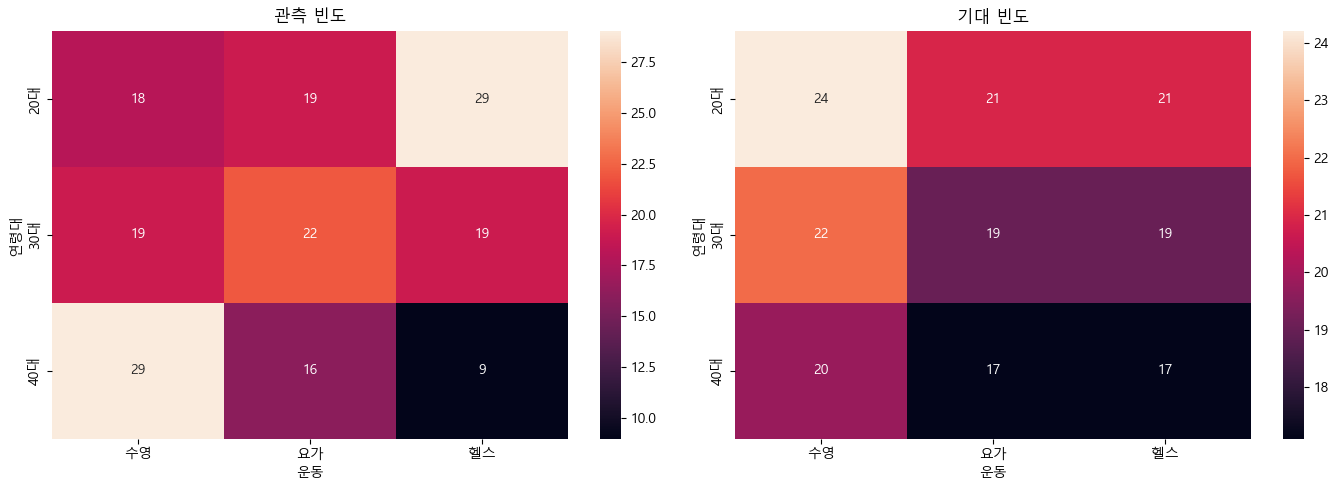

In [ ]:
# TODO (d): 히트맵 시각화 (관측 빈도 vs 기대 빈도)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# TODO: 관측 빈도 히트맵
sns.heatmap(ct_raw_ex, ax = axes[0], annot = True)
axes[0].set_title('관측 빈도')

# TODO: 기대 빈도 히트맵
sns.heatmap(pd.DataFrame(expected_ex, index = ct_raw_ex.index, columns = ct_raw_ex.columns) ,ax = axes[1], annot = True)
axes[1].set_title('기대 빈도')

plt.tight_layout()
plt.show()


### 문제 4-3: 면접 방식별 합격률

위 데이터와 별개로, 한 중소기업 인사팀에서 **면접 방식**(대면/화상)에 따라

최종 합격률이 다른지 파악하려 합니다.

소규모 채용 회차로 총 **20명**의 지원자 데이터입니다.

**분석 목표**: 면접 방식(대면/화상)에 따라 최종 합격률에 유의한 차이가 있는지 검정합니다.

**주어진 데이터:**

In [79]:
print("\n[문제 4-3] 면접 방식별 합격률")
print("-" * 40)

# 2×2 교차표
#              합격    불합격
# 대면 면접     7       3      = 10
# 화상 면접     2       8      = 10
#               9      11      = 20
data_fisher_q4 = np.array([[7, 3],
                            [2, 8]])

ct_fisher_q4 = pd.DataFrame(data_fisher_q4,
                            index=['대면 면접', '화상 면접'],
                            columns=['합격', '불합격'])
ct_display_q4 = ct_fisher_q4.copy()
ct_display_q4['합계'] = ct_display_q4.sum(axis=1)
ct_display_q4.loc['합계'] = ct_display_q4.sum()
print("교차표:")
display(ct_display_q4)



[문제 4-3] 면접 방식별 합격률
----------------------------------------
교차표:


,합격,불합격,합계
대면 면접,7,3,10
화상 면접,2,8,10
합계,9,11,20


**(a)** **귀무가설(H₀)** 과 **대립가설(H₁)** 을 설정하세요.

**(b)** **양측검정** 또는 **단측검정** 중 어떤 것이 적절한지 결정하고, 그 근거를 설명하세요.

> Fisher 정확검정에서는 양측/단측 선택이 결과에 직접 영향을 줍니다.

**(c)** 기대빈도를 계산하고 Cochran's rule을 점검하세요.

카이제곱 검정을 적용할 수 있는지 판단하세요.

**(d)** 적절한 검정을 선택하여 수행하세요 (α = 0.05).

왜 이 검정을 선택했는지 이유를 설명하세요.

**(e)** 오즈비(OR)를 구하고 해석하세요.

> 오즈(Odds) = 해당 사건 / 반대 사건 \
> 오즈비(OR) = 한 집단의 오즈 / 다른 집단의 오즈 \
> 예: 대면 면접의 합격 오즈 = 합격 / 불합격

**(f)** 효과크기 φ(Phi) 계수를 계산하고 해석하세요.

In [87]:
# TODO (a): 가설 설정
print("(a) 가설 설정:")
print(f"    H₀: 면접 방식에 따른 합격률은 차이가 없다.")
print(f"    H₁: 면접 방식에 따라서 합격률은 차이가 있다.")

# TODO (b): 양측/단측 결정
print(f"\n(b) 검정 방향:")
print(f"    선택: 양측검정")
print(f"    근거: 두 방식의 합격률에 차이가 존재하는 지를 파악하기 위함이어서 양측검정을 선택했다.")

# TODO (c): 기대빈도 + Cochran's rule
chi2_q4, p_chi2_q4, dof_q4, expected_q4 = stats.chi2_contingency(ct_fisher_q4)

print(f"\n(c) 기대빈도:")
display(expected_q4)
print(f"    Cochran's rule: 기대빈도가 5 미만인 셀이 전체 셀의 50%이므로 코크란 룰을 만족하지 못 한다.")
print(f"    카이제곱 적용 가능 여부: 따라서, 카이제곱 통계량이 카이제곱 분포를 따르지 못하므로, 카이제곱 검정을 사용할 수 없다.")

# TODO (d): 검정 수행
odds_ratio_q4, fisher_p_q4 = stats.fisher_exact(data_fisher_q4, alternative = 'two-sided')

print(f"\n(d) 검정 결과:")
print(f"    p-value = {fisher_p_q4}")
print(f"    판정 (α=0.05): 유의수준 5% 하에서 귀무가설을 기각할 수 없다.")
print(f'     하지만, p-value가 유의수준 근방이므로 표본을 더 수집하여 검정을 다시 진행해야 한다.')
print(f"    검정 선택 이유: 카이제곱 통계량은 기대빈도가 5 미만인 셀이 존재할 경우, 카이제곱 검정값의 분모가 작아져 통계량 값이 커지게 된다.")
print(f'    따라서, 조합을 통해 정확한 통계량을 계산하는 피셔의 정확 검정을 사용하였다.')

# TODO (e): 오즈비 해석
print(f"\n(e) 오즈비:")
print(f"    OR = {odds_ratio_q4}")
print(f'    오즈비가 {odds_ratio_q4:.2f}로 대면 면접을 본 사람의 합격 오즈가 화상 면접을 본 사람의 합격 오즈보다 9.33배 높다. ')

# TODO (f): Phi 계수
phi_q4 = np.sqrt(chi2_q4 / 20)

print(f"\n(f) Phi 계수(φ) = {phi_q4:.2f}")
print(f"    해석: phi 계수가 {phi_q4:.2f}로 효과 크기가 크다고 할 수 있다.")
print(f'따라서, 귀무가설을 기각하지 못 했지만 효과 차이가 크기 때문에 현재의 표본으로는 통계적으로 유의한지 판단하기 어렵다.')

(a) 가설 설정:
    H₀: 면접 방식에 따른 합격률은 차이가 없다.
    H₁: 면접 방식에 따라서 합격률은 차이가 있다.

(b) 검정 방향:
    선택: 양측검정
    근거: 두 방식의 합격률에 차이가 존재하는 지를 파악하기 위함이어서 양측검정을 선택했다.

(c) 기대빈도:


array([[4.5, 5.5],
       [4.5, 5.5]])

    Cochran's rule: 기대빈도가 5 미만인 셀이 전체 셀의 50%이므로 코크란 룰을 만족하지 못 한다.
    카이제곱 적용 가능 여부: 따라서, 카이제곱 통계량이 카이제곱 분포를 따르지 못하므로, 카이제곱 검정을 사용할 수 없다.

(d) 검정 결과:
    p-value = 0.06977851869492736
    판정 (α=0.05): 유의수준 5% 하에서 귀무가설을 기각할 수 없다.
     하지만, p-value가 유의수준 근방이므로 표본을 더 수집하여 검정을 다시 진행해야 한다.
    검정 선택 이유: 카이제곱 통계량은 기대빈도가 5 미만인 셀이 존재할 경우, 카이제곱 검정값의 분모가 작아져 통계량 값이 커지게 된다.
    따라서, 조합을 통해 정확한 통계량을 계산하는 피셔의 정확 검정을 사용하였다.

(e) 오즈비:
    OR = 9.333333333333334
    오즈비가 9.33로 대면 면접을 본 사람의 합격 오즈가 화상 면접을 본 사람의 합격 오즈보다 9.33배 높다. 

(f) Phi 계수(φ) = 0.40
    해석: phi 계수가 0.40로 효과 크기가 크다고 할 수 있다.
따라서, 귀무가설을 기각하지 못 했지만 효과 차이가 크기 때문에 현재의 표본으로는 통계적으로 유의한지 판단하기 어렵다.
